#Emoji Prediction Us😉

In [1]:
pip install numpy

You should consider upgrading via the 'c:\Users\ANKAN\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import emoji

from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

#Loading the Dataset

In [2]:
import pandas as pd
data = pd.read_csv(r'C:\Users\ANKAN\Desktop\project\NewData.csv',header=None)
#data=data.astype(str)

In [3]:
data.head()

,0,1,2,3
0,French macaroon is so tasty,4,NaN,NaN
1,work is horrible,3,NaN,NaN
2,I am upset,3,NaN,NaN
3,throw the ball,1,NaN,NaN
4,Good joke,2,NaN,NaN


#emojis

In [4]:
import emoji

In [5]:
emoji_dict={
    "0":':face_with_tongue:',
    "1":':baseball:',
    "2":':face_with_tears_of_joy:',
    "3":':face_with_head-bandage:',
    "4":':bread:'
}


In [6]:
emoji_dict = {
    0: ":red_heart:",
    1: ":baseball:",
    2: ":grinning_face_with_big_eyes:",
    3: ":disappointed_face:",
    4: ":fork_and_knife_with_plate:"
}

def label_to_emoji(label):
    return emoji.emojize(emoji_dict[label])

In [7]:
import emoji
for ix in emoji_dict.keys():
    print (ix,end=" ")
    print (emoji.emojize(emoji_dict[ix]))

0 ❤️
1 ⚾
2 😃
3 😞
4 🍽️


#Pre process our text

In [8]:
X = data[0].values
Y=data[1].values

In [9]:
file =open(r'C:\Users\ANKAN\Desktop\project\glove.6B.50d.txt','r',encoding ='utf8')
content=file.readlines()
file.close()

#content

In [10]:
embeddings = {}

for line in content:
    line = line.split()
    embeddings[line[0]] = np.array(line[1:], dtype = float)

In [11]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
word2index = tokenizer.word_index


In [14]:
def get_maxlen(data):
    maxlen = 0
    for sent in data:
        maxlen = max(maxlen, len(sent))
    return maxlen

maxlen = get_maxlen(Xtokens)
print(maxlen)

10


In [15]:
Xtokens=tokenizer.texts_to_sequences(X)
Xtrain = pad_sequences(Xtokens, maxlen = maxlen,  padding = 'post', truncating = 'post')

In [16]:
Xtrain

array([[104, 105,   3, ...,   0,   0,   0],
       [259,   3, 260, ...,   0,   0,   0],
       [  1,   7, 261, ...,   0,   0,   0],
       ...,
       [ 40,   3, 170, ...,   0,   0,   0],
       [  1,  18,   2, ...,   0,   0,   0],
       [ 42,  32,   0, ...,   0,   0,   0]])

In [17]:
Ytrain = to_categorical(Y)

#model

In [18]:
embed_size = 50
embedding_matrix = np.zeros((len(word2index)+1, embed_size))

for word, i in word2index.items():
    embed_vector = embeddings[word]
    embedding_matrix[i] = embed_vector

In [19]:
embedding_matrix

array([[ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 1.1891e-01,  1.5255e-01, -8.2073e-02, ..., -5.7512e-01,
        -2.6671e-01,  9.2121e-01],
       [-1.0919e-03,  3.3324e-01,  3.5743e-01, ..., -4.5697e-01,
        -4.8969e-02,  1.1316e+00],
       ...,
       [-1.0398e+00,  2.5462e-01, -1.0193e+00, ..., -5.3440e-01,
        -6.1264e-01,  3.0941e-01],
       [-4.1236e-01,  6.4930e-01, -5.5848e-01, ...,  2.6206e-01,
         1.0448e-01, -4.4302e-01],
       [-9.5702e-01, -5.8742e-01, -1.0281e+00, ...,  8.6548e-01,
         3.6066e-01, -7.0635e-02]])

In [20]:
model = Sequential([
    Embedding(input_dim = len(word2index) + 1,
              output_dim = embed_size,
              input_length = maxlen,
              weights = [embedding_matrix],
              trainable = False
             ),
    
    LSTM(units = 16, return_sequences = True),
    LSTM(units = 4),
    Dense(5, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
model.fit(Xtrain, Ytrain, epochs = 100)

Epoch 1/100
10/10 [==============================] - 4s 9ms/step - loss: 1.6290 - accuracy: 0.1238
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 1.5903 - accuracy: 0.1841
Epoch 3/100
10/10 [==============================] - 0s 11ms/step - loss: 1.5661 - accuracy: 0.2032
Epoch 4/100
10/10 [==============================] - 0s 10ms/step - loss: 1.5432 - accuracy: 0.2508
Epoch 5/100
10/10 [==============================] - 0s 10ms/step - loss: 1.5210 - accuracy: 0.2794
Epoch 6/100
10/10 [==============================] - 0s 12ms/step - loss: 1.4894 - accuracy: 0.2952
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 1.4516 - accuracy: 0.2984
Epoch 8/100
10/10 [==============================] - 0s 10ms/step - loss: 1.4067 - accuracy: 0.3873
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 1.3521 - accuracy: 0.4508
Epoch 10/100
10/10 [==============================] - 0s 10ms/step - loss: 1.2918 - accuracy: 0.5238


In [26]:
test = ["lets play", "I feel very bad", "lets eat dinner"]

test_seq = tokenizer.texts_to_sequences(test)
Xtest = pad_sequences(test_seq, maxlen = maxlen, padding = 'post', truncating = 'post')

y_pred = model.predict(Xtest)
y_pred = np.argmax(y_pred, axis = 1)

for i in range(len(test)):
  print(test[i], label_to_emoji(y_pred[i]))



1/1 [==============================] - 1s 1s/step
lets play ⚾
I feel very bad 😞
lets eat dinner 🍽️


In [22]:
model.history.history??

Type:        dict
String form: {'loss': [1.628960132598877, 1.5903291702270508, 1.566116452217102, 1.5431748628616333, 1.5209505558013916, 1.4893783330917358, 1.4515528678894043, 1.4067295789718628, 1.3521039485931396, 1.2918223142623901, 1.2268884181976318, 1.161987543106079, 1.1025888919830322, 1.0584723949432373, 1.0164086818695068, 0.974574863910675, 0.9529733657836914, 0.903121292591095, 0.8747261166572571, 0.8396121263504028, 0.8141101598739624, 0.7878056764602661, 0.7615819573402405, 0.7355793714523315, 0.7085464596748352, 0.6861079335212708, 0.6693482398986816, 0.6490151286125183, 0.6375136971473694, 0.6154054999351501, 0.5950574278831482, 0.5625659227371216, 0.5362991690635681, 0.5237601399421692, 0.5120091438293457, 0.49982914328575134, 0.4907359778881073, 0.48429760336875916, 0.47491928935050964, 0.471161812543869, 0.4669279158115387, 0.45580682158470154, 0.4480549097061157, 0.44295814633369446, 0.43688079714775085, 0.43029946088790894, 0.4323338568210602, 0.4240926504135132

In [23]:
model.history.history.keys()

dict_keys(['loss', 'accuracy'])

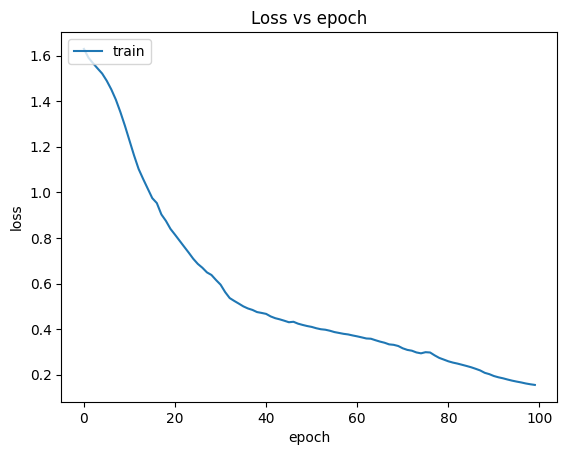

In [24]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.plot(model.history.history['loss'])
plt.title('Loss vs epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()


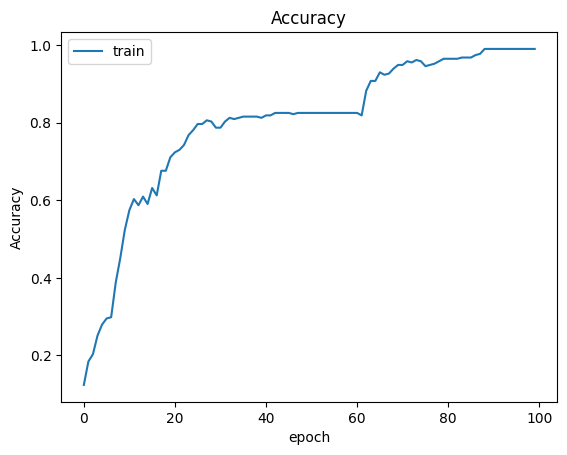

In [25]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.plot(model.history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()